# MORFEO throughput

In [1]:
import numpy as np
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from arte.photometry.morfeo_transmissive_systems import MorfeoLgsChannelTransmissiveSystem_001, \
    MorfeoLgsChannelTransmissiveSystem_002, MorfeoLgsChannelTransmissiveSystem_003
from arte.photometry.transmissive_elements_catalogs import MorfeoTransmissiveElementsCatalog, \
    GlassesTransmissiveElementsCatalog, CoatingsTransmissiveElementsCatalog, \
    DetectorsTransmissiveElementsCatalog

import warnings
warnings.filterwarnings('ignore')

# MORFEO Main Path Optics

## Correcting (Schmidt) Plate

[] Angstrom
[]


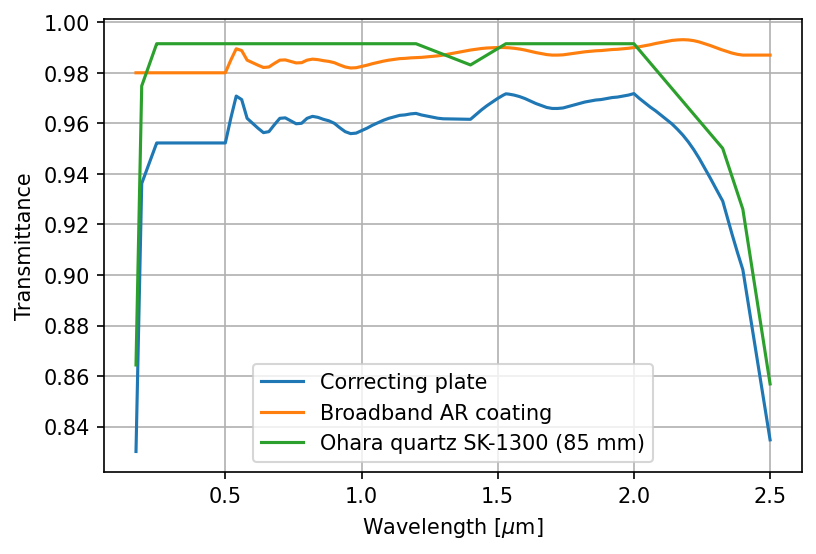

In [2]:
schmidt_plate = MorfeoTransmissiveElementsCatalog.schmidt_plate_003()
ar_coat_broad = CoatingsTransmissiveElementsCatalog.ar_coating_broadband_001()
ohara_sk1300 = GlassesTransmissiveElementsCatalog.ohara_quartz_SK1300_85mm_internal_001()
wv = schmidt_plate.waveset

mpl.rcParams['figure.dpi'] = 150
plt.plot(wv.to(u.um), schmidt_plate.transmittance(wv), label='Correcting plate')
plt.plot(wv.to(u.um), ar_coat_broad.transmittance(wv), label='Broadband AR coating')
plt.plot(wv.to(u.um), ohara_sk1300.transmittance(wv), label='Ohara quartz SK-1300 (85 mm)')
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend()
# plt.xlim(0.5, 2.5)
plt.grid()

wv = schmidt_plate.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(schmidt_plate.transmittance(wv[id_589nm]))

## LGS dichroic

(0.5, 2.0)

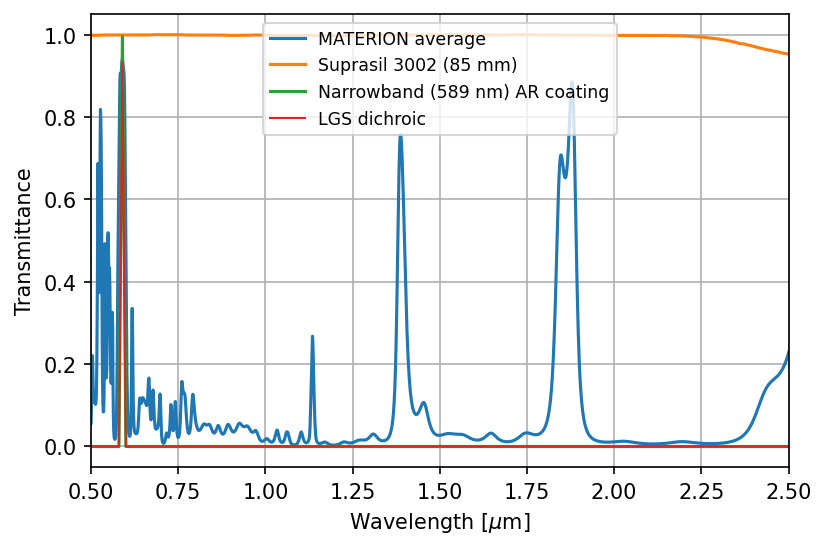

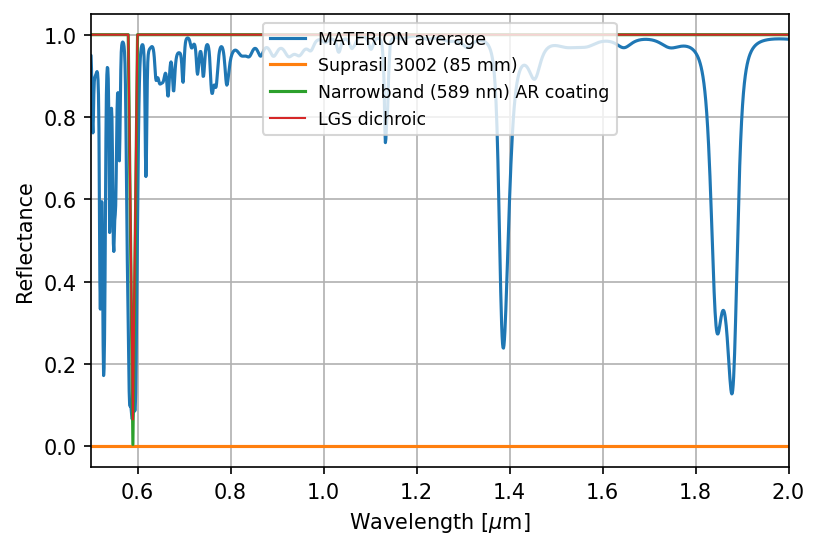

In [3]:
lgs_dichroic = MorfeoTransmissiveElementsCatalog.lgs_dichroic_003()
materion = CoatingsTransmissiveElementsCatalog.materion_average_002()
supra3002 = GlassesTransmissiveElementsCatalog.suprasil3002_85mm_internal_001()
ar_coat_589nm = CoatingsTransmissiveElementsCatalog.ar_coating_589nm_001()

wv = lgs_dichroic.waveset
plt.plot(wv.to(u.um), materion.transmittance(wv), label='MATERION average')
plt.plot(wv.to(u.um), supra3002.transmittance(wv), label='Suprasil 3002 (85 mm)')
plt.plot(wv.to(u.um), ar_coat_589nm.transmittance(wv), label='Narrowband (589 nm) AR coating')
plt.plot(wv.to(u.um), lgs_dichroic.transmittance(wv), label='LGS dichroic', linewidth=1)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend(loc='upper center', fontsize='small')
plt.grid()
plt.xlim(0.5, 2.5)

plt.figure()
plt.plot(wv.to(u.um), materion.reflectance(wv), label='MATERION average')
plt.plot(wv.to(u.um), supra3002.reflectance(wv), label='Suprasil 3002 (85 mm)')
plt.plot(wv.to(u.um), ar_coat_589nm.reflectance(wv), label='Narrowband (589 nm) AR coating')
plt.plot(wv.to(u.um), lgs_dichroic.reflectance(wv), label='LGS dichroic', linewidth=1)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Reflectance')
plt.legend(loc='upper center', fontsize='small')
plt.grid()
plt.xlim(0.5, 2)

# print(wv[id_589nm])
# print(lgs_dichroic.transmittance(wv[id_589nm]))

# print(wv[id_589nm])
# print(lgs_dichroic.transmittance(wv[id_589nm]))

# Transmission at LGS channel

## LGSO folding mirror

[5900.] Angstrom
[0.99]


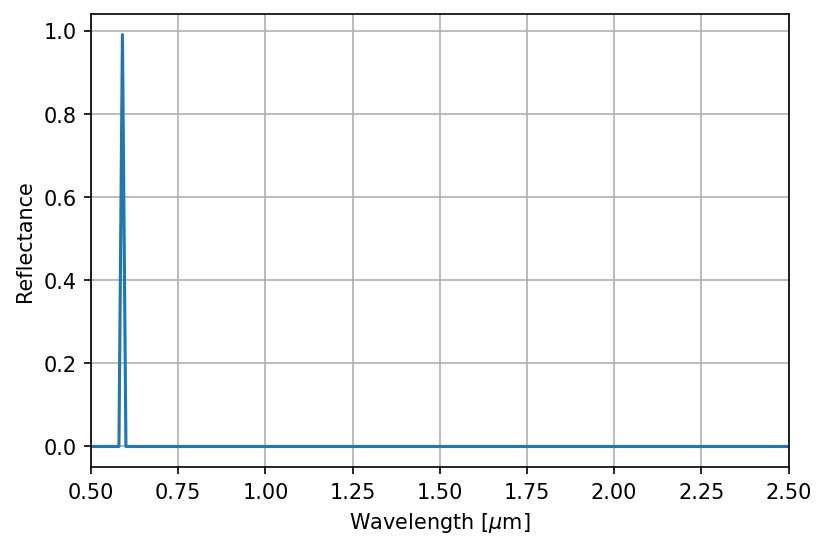

In [4]:
lgso_fm = MorfeoTransmissiveElementsCatalog.lgso_fm_001()
mpl.rcParams['figure.dpi'] = 150
lgso_fm.plot(transmittance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Reflectance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_fm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_fm.reflectance(wv[id_589nm]))

## LGSO lenses

[5900.] Angstrom
[0.99892053]
[0.99500625]
[0.98896872]


(0.5, 2.5)

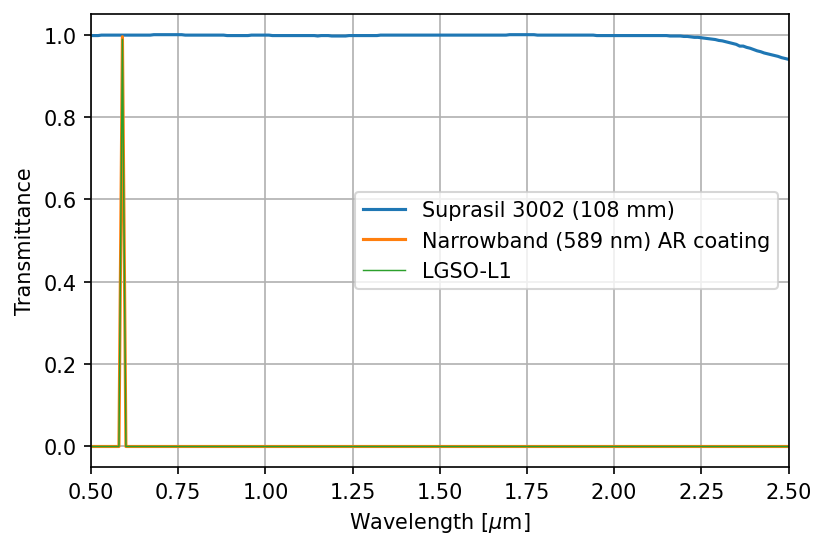

In [5]:
lgso_l1 = MorfeoTransmissiveElementsCatalog.lgso_lens1_001()
wv = lgso_l1.waveset
supra108mm = GlassesTransmissiveElementsCatalog.suprasil3002_108mm_internal_001()
ar_coat_589nm = CoatingsTransmissiveElementsCatalog.ar_coating_589nm_001()
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra108mm.transmittance(wv[id_589nm]))
print(ar_coat_589nm.transmittance(wv[id_589nm]))
print(lgso_l1.transmittance(wv[id_589nm]))

mpl.rcParams['figure.dpi'] = 150
plt.plot(wv.to(u.um), supra108mm.transmittance(wv), label='Suprasil 3002 (108 mm)')
plt.plot(wv.to(u.um), ar_coat_589nm.transmittance(wv), label='Narrowband (589 nm) AR coating')
plt.plot(wv.to(u.um), lgso_l1.transmittance(wv), label='LGSO-L1', linewidth=0.7)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend()
plt.grid()
plt.xlim(0.5, 2.5)

[5900.] Angstrom
[0.99930021]
[5900.] Angstrom
[0.98934462]


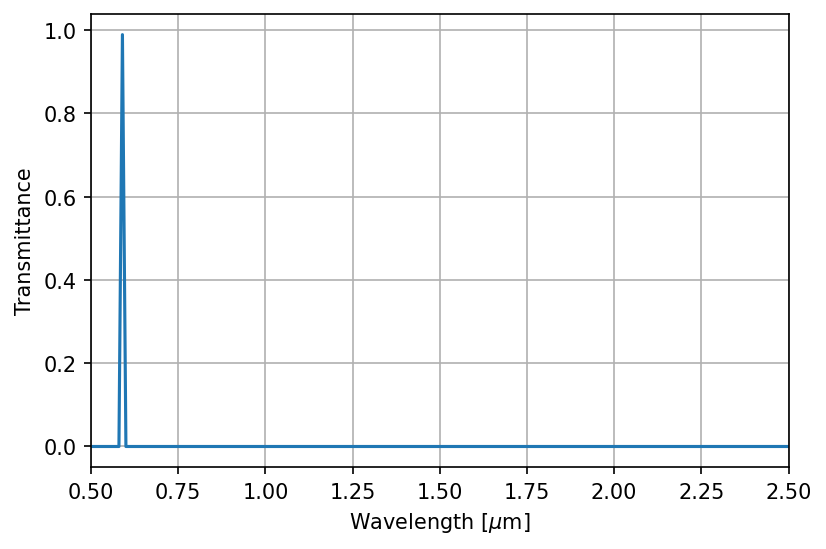

In [6]:
supra70mm = GlassesTransmissiveElementsCatalog.suprasil3002_70mm_internal_001()
wv = supra70mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra70mm.transmittance(wv[id_589nm]))

lgso_l2 = MorfeoTransmissiveElementsCatalog.lgso_lens2_001()
mpl.rcParams['figure.dpi'] = 150
lgso_l2.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_l2.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_l2.transmittance(wv[id_589nm]))

[5900.] Angstrom
[0.99960006]
[5900.] Angstrom
[0.98964148]


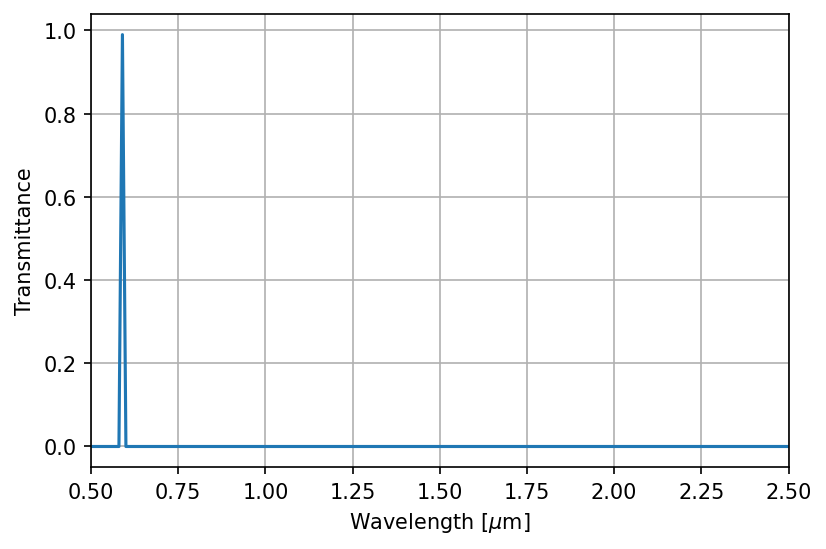

In [7]:
supra40mm = GlassesTransmissiveElementsCatalog.suprasil3002_40mm_internal_001()
wv = supra40mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra40mm.transmittance(wv[id_589nm]))

lgso_l3 = MorfeoTransmissiveElementsCatalog.lgso_lens3_001()
mpl.rcParams['figure.dpi'] = 150
lgso_l3.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_l3.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_l3.transmittance(wv[id_589nm]))

[5900.] Angstrom
[0.99940015]
[5900.] Angstrom
[0.98944356]


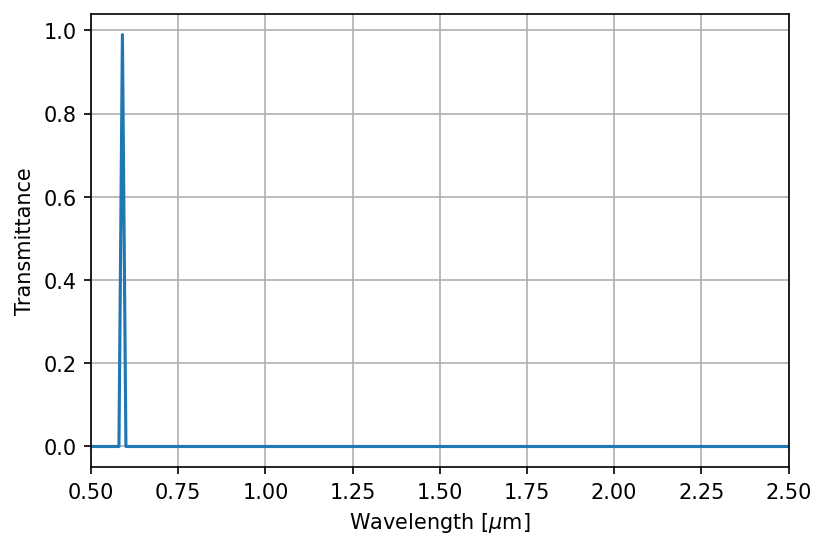

In [8]:
supra60mm = GlassesTransmissiveElementsCatalog.suprasil3002_60mm_internal_001()
wv = supra60mm.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(supra60mm.transmittance(wv[id_589nm]))

lgso_l4 = MorfeoTransmissiveElementsCatalog.lgso_lens4_001()
mpl.rcParams['figure.dpi'] = 150
lgso_l4.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgso_l4.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgso_l4.transmittance(wv[id_589nm]))

## LGS WFS

Collimator Module + Detector Module. Camera and detector windows are not considered.

[5890.] Angstrom
[0.8092472]


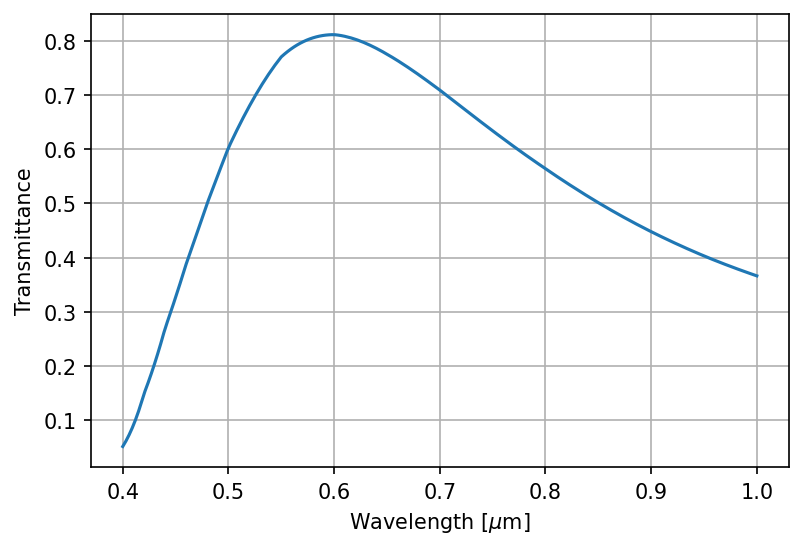

In [9]:
lgs_wfs = MorfeoTransmissiveElementsCatalog.lgs_wfs_001()
mpl.rcParams['figure.dpi'] = 150
lgs_wfs.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmittance')
plt.legend('', frameon=False)

wv = lgs_wfs.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgs_wfs.transmittance(wv[id_589nm]))

## Detector
C-Blue camera QE. It includes camera and detector windows.

[5880.        5880.0000001 5900.        5900.0000001] Angstrom
[0.  0.7 0.7 0. ]
[  2000.          5880.          5880.0000001   5900.
   5900.0000001 100000.       ] Angstrom


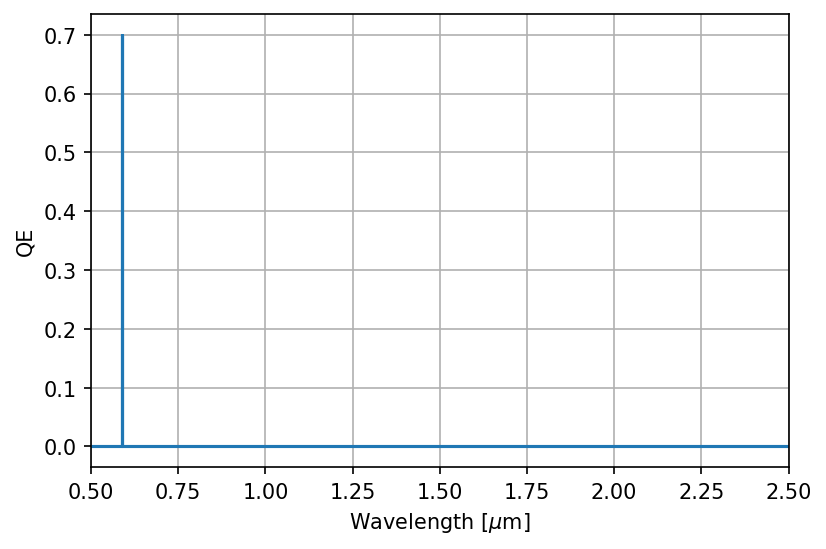

In [10]:
lgs_det = DetectorsTransmissiveElementsCatalog.c_blue_qe_001()
mpl.rcParams['figure.dpi'] = 150
lgs_det.plot(reflectance=False, absorptance=False, wv_unit=u.um)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('QE')
plt.legend('', frameon=False)
plt.xlim(0.5, 2.5)

wv = lgs_det.waveset
id_589nm = np.where(np.isclose(np.array(wv), 5890., atol=10))
print(wv[id_589nm])
print(lgs_det.transmittance(wv[id_589nm]))
print(wv)

## Throughput of LGS channel

Throughput at 589 nm: 0.24185471244576406


(0.5, 2.5)

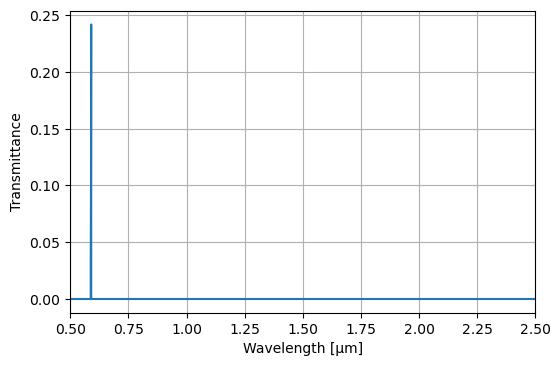

In [11]:
lgs_ch = MorfeoLgsChannelTransmissiveSystem_003()
waveset = lgs_ch.transmittance.waveset
transmittance = lgs_ch.transmittance(waveset)
nu_max_t = np.argmax(transmittance)
print('Throughput at 589 nm: %s' %transmittance.max())

mpl.rcParams['figure.dpi'] = 100
plt.plot(waveset.to(u.um), transmittance)
plt.grid()
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.xlim(0.5, 2.5)

# Transmission at LO channel

In [1]:
import numpy as np
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from arte.photometry.morfeo_transmissive_systems import MorfeoLowOrderChannelTransmissiveSystem_002
from arte.photometry.transmissive_elements_catalogs import MorfeoTransmissiveElementsCatalog, \
    GlassesTransmissiveElementsCatalog, CoatingsTransmissiveElementsCatalog, \
    DetectorsTransmissiveElementsCatalog, EltTransmissiveElementsCatalog

### Silver mirrors

[15000. 15100. 15200. 15300. 15400. 15500. 15600. 15700. 15800. 15900.
 16000. 16100. 16200. 16300. 16400. 16500. 16600. 16700. 16800. 16900.
 17000. 17100. 17200. 17300. 17400. 17500. 17600. 17700. 17800. 17900.
 18000.] Angstrom
H band average transmission of LO channel: 0.9865649324838711


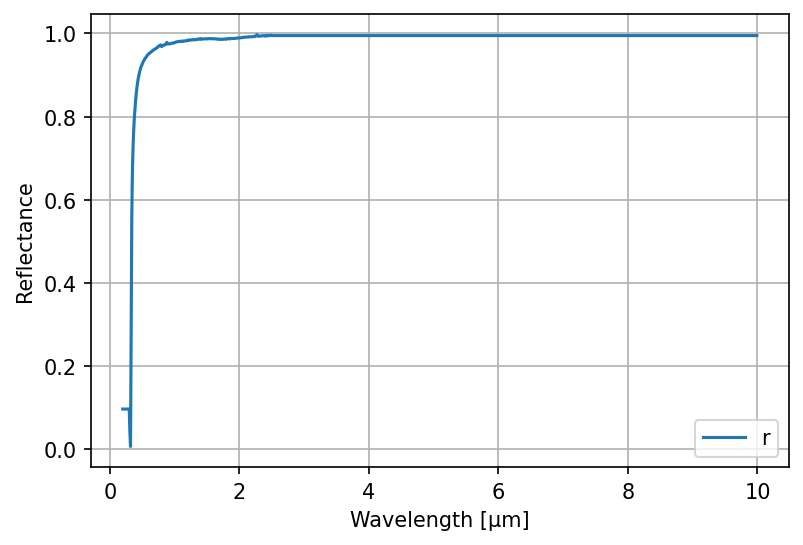

In [2]:
ag_mirror = EltTransmissiveElementsCatalog.ag_mirror_elt_001()

mpl.rcParams['figure.dpi'] = 150
ag_mirror.plot(transmittance=None, absorptance=None, wv_unit=u.um)
plt.xlabel('Wavelength [μm]')
plt.ylabel('Reflectance')

wv = ag_mirror.waveset
wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.where(np.isclose(np.array(wv), wv_H_min.to(u.Angstrom).value, atol=10))[0][0]
id_H_max = np.where(np.isclose(np.array(wv), wv_H_max.to(u.Angstrom).value, atol=10))[0][0]
print(wv[id_H_min:id_H_max+1])
print('H band average transmission of LO channel: %s' %np.mean(ag_mirror.reflectance(wv)[id_H_min:id_H_max+1]))

### Aluminium mirrors

[15000. 15100. 15200. 15300. 15400. 15500. 15600. 15700. 15800. 15900.
 16000. 16100. 16200. 16300. 16400. 16500. 16600. 16700. 16800. 16900.
 17000. 17100. 17200. 17300. 17400. 17500. 17600. 17700. 17800. 17900.
 18000.] Angstrom
H band average transmission of LO channel: 0.9748631321935484


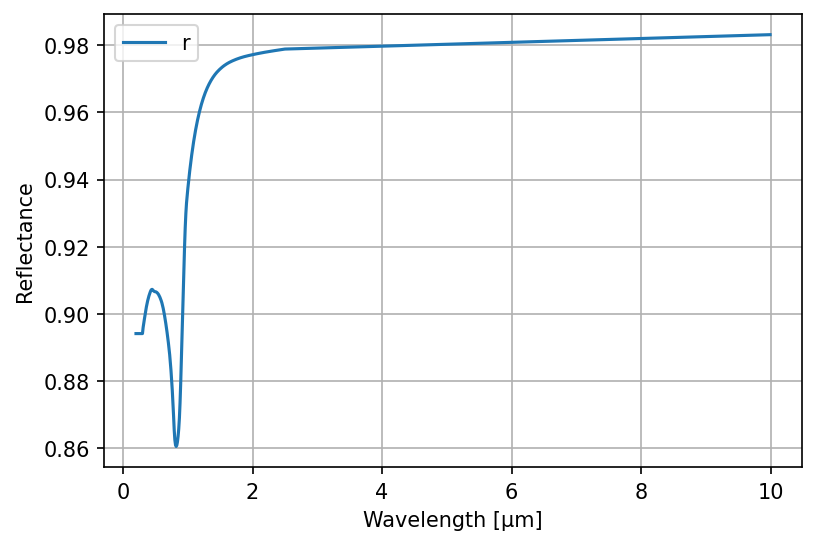

In [3]:
al_mirror = EltTransmissiveElementsCatalog.al_mirror_elt_001()

mpl.rcParams['figure.dpi'] = 150
al_mirror.plot(transmittance=None, absorptance=None, wv_unit=u.um)
plt.xlabel('Wavelength [μm]')
plt.ylabel('Reflectance')

wv = al_mirror.waveset
wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.where(np.isclose(np.array(wv), wv_H_min.to(u.Angstrom).value, atol=10))[0][0]
id_H_max = np.where(np.isclose(np.array(wv), wv_H_max.to(u.Angstrom).value, atol=10))[0][0]
print(wv[id_H_min:id_H_max+1])
print('H band average transmission of LO channel: %s' %np.mean(al_mirror.reflectance(wv)[id_H_min:id_H_max+1]))

### Correcting plate

H band average transmission of LO channel: 0.9685578491408995
[15000. 15200. 15300. 15400. 15600. 15800. 16000. 16200. 16400. 16600.
 16800. 17000. 17200. 17400. 17600. 17800. 18000.] Angstrom


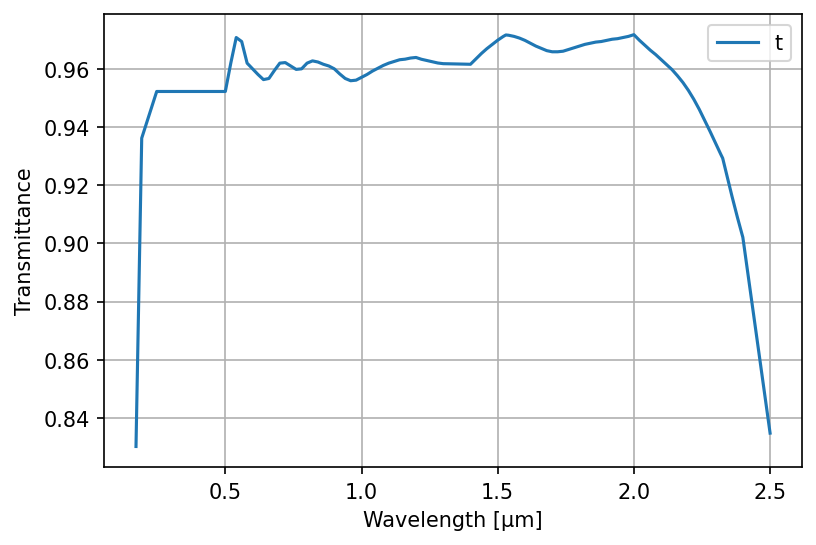

In [4]:
c_plate = MorfeoTransmissiveElementsCatalog.schmidt_plate_003()

mpl.rcParams['figure.dpi'] = 150
c_plate.plot(reflectance=None, absorptance=None, wv_unit=u.um)
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')

wv = c_plate.waveset
wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.where(np.isclose(np.array(wv), wv_H_min.to(u.Angstrom).value, atol=10))[0][0]
id_H_max = np.where(np.isclose(np.array(wv), wv_H_max.to(u.Angstrom).value, atol=10))[0][0]
print('H band average transmission of LO channel: %s' %np.mean(c_plate.transmittance(wv)[id_H_min:id_H_max+1]))
print(wv[id_H_min:id_H_max+1])

### LGS dichroic
The LGS dichroic is in reflection for the LOR module. Thus, we simply consider the contribution of the coating on the first surface.

H band average transmission of LO channel: 0.9753691721854306
[14990. 15000. 15010. 15020. 15030. 15040. 15050. 15060. 15070. 15080.
 15090. 15100. 15110. 15120. 15130. 15140. 15150. 15160. 15170. 15180.
 15190. 15200. 15210. 15220. 15230. 15240. 15250. 15260. 15270. 15280.
 15290. 15300. 15310. 15320. 15330. 15340. 15350. 15360. 15370. 15380.
 15390. 15400. 15410. 15420. 15430. 15440. 15450. 15460. 15470. 15480.
 15490. 15500. 15510. 15520. 15530. 15540. 15550. 15560. 15570. 15580.
 15590. 15600. 15610. 15620. 15630. 15640. 15650. 15660. 15670. 15680.
 15690. 15700. 15710. 15720. 15730. 15740. 15750. 15760. 15770. 15780.
 15790. 15800. 15810. 15820. 15830. 15840. 15850. 15860. 15870. 15880.
 15890. 15900. 15910. 15920. 15930. 15940. 15950. 15960. 15970. 15980.
 15990. 16000. 16010. 16020. 16030. 16040. 16050. 16060. 16070. 16080.
 16090. 16100. 16110. 16120. 16130. 16140. 16150. 16160. 16170. 16180.
 16190. 16200. 16210. 16220. 16230. 16240. 16250. 16260. 16270. 16280.
 16290. 16300. 

  points: [ 5000.  5010.  5020.  5070.  5080.  5090.  5100.  5110.  5120.  5130.
  5140.  5150.  5160.  5170.  5200.  5210.  5300.  5310.  5320.  5330.
  5340.  5350.  5360.  5370.  5400.  5410.  5530.  5540.  5550.  5560.
  5570.  5580.  5590.  5610.  5620.  5760.  5840.  5850.  5890.  5900.
  5910.  5920.  5930.  5980.  5990.  6000.  6010.  6030.  6040.  6050.
  6060.  6070.  6080.  6090.  6100.  6110.  6170.  6220.  6230.  6240.
  6290.  6300.  6310.  6320.  6330.  6340.  6350.  6360.  6370.  6380.
  6390.  6400.  6410.  6420.  6430.  6580.  6590.  6600.  6610.  6620.
  6630.  6640.  6650.  6660.  6670.  6680.  6690.  6780.  6790.  6900.
  6910.  6920.  6930.  6940.  6950.  6960.  6970.  6980.  6990.  7000.
  7010.  7020.  7030.  7040.  7050.  7170.  7180.  7190.  7200.  7290.
  7300.  7310.  7410.  7420.  7430.  7590.  7600.  7610.  7620.  7630.
  7640.  7650.  7660.  7670.  7680.  7700.  7710.  7720.  7730.  7740.
  7750.  7760.  7770.  7780.  7790.  7800.  7810.  7820.  7830.  78

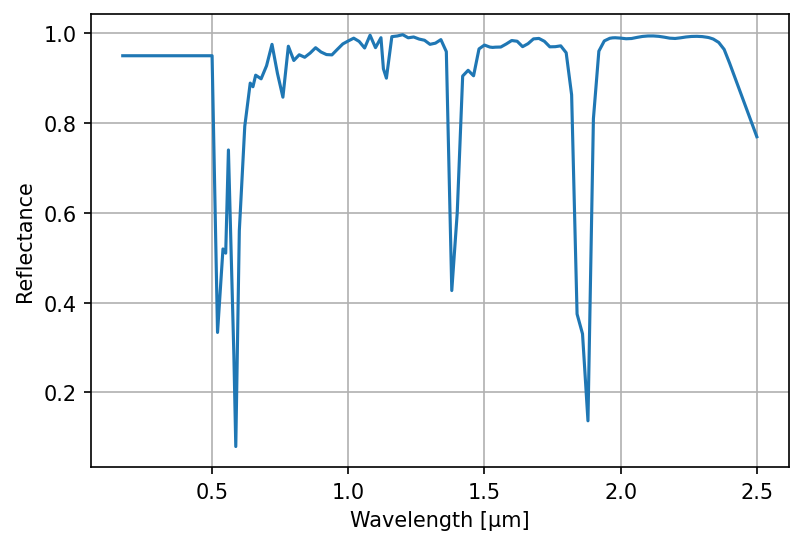

In [5]:
lgs_dich = CoatingsTransmissiveElementsCatalog.materion_average_002()

mpl.rcParams['figure.dpi'] = 150
plt.plot(wv.to(u.um), lgs_dich.reflectance(wv))
plt.xlabel('Wavelength [μm]')
plt.ylabel('Reflectance')
plt.grid()

wv = lgs_dich.waveset
wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.where(np.isclose(np.array(wv), wv_H_min.to(u.Angstrom).value, atol=10))[0][0]
id_H_max = np.where(np.isclose(np.array(wv), wv_H_max.to(u.Angstrom).value, atol=10))[0][0]
print('H band average transmission of LO channel: %s' %np.mean(lgs_dich.reflectance(wv)[id_H_min:id_H_max+2]))
print(wv[id_H_min:id_H_max+2])

### VISIR dichroic

H band average transmission of LO channel: 0.9774872985575147
[14990. 15000. 15000. 15010. 15020. 15030. 15040. 15050. 15060. 15070.
 15080. 15090. 15100. 15110. 15120. 15130. 15140. 15150. 15160. 15170.
 15180. 15190. 15200. 15210. 15220. 15230. 15240. 15250. 15260. 15270.
 15280. 15290. 15300. 15310. 15320. 15330. 15340. 15350. 15360. 15370.
 15380. 15390. 15400. 15400. 15410. 15420. 15430. 15440. 15450. 15460.
 15470. 15480. 15490. 15500. 15500. 15510. 15520. 15530. 15540. 15550.
 15560. 15570. 15580. 15590. 15600. 15600. 15610. 15620. 15630. 15640.
 15650. 15660. 15670. 15680. 15690. 15700. 15700. 15710. 15720. 15730.
 15740. 15750. 15760. 15770. 15780. 15790. 15800. 15800. 15810. 15820.
 15830. 15840. 15850. 15860. 15870. 15880. 15890. 15900. 15900. 15910.
 15920. 15930. 15940. 15950. 15960. 15970. 15980. 15990. 16000. 16000.
 16010. 16020. 16030. 16040. 16050. 16060. 16070. 16080. 16090. 16100.
 16100. 16110. 16120. 16130. 16140. 16150. 16160. 16170. 16180. 16190.
 16200. 16200. 

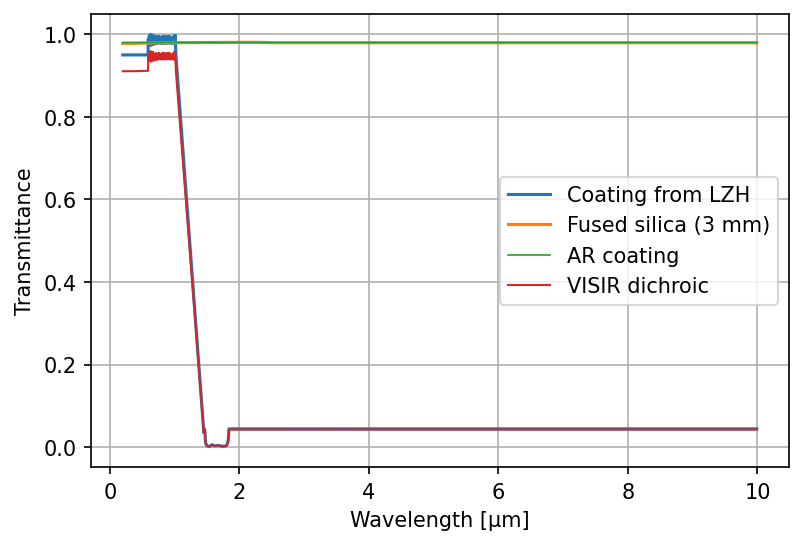

In [6]:
visir_dich = MorfeoTransmissiveElementsCatalog.visir_dichroic_002()
wv = visir_dich.waveset
lzh_coating = CoatingsTransmissiveElementsCatalog.lzh_coating_for_visir_dichroic_001()
fused_silica_3mm = GlassesTransmissiveElementsCatalog.suprasil3001_3mm_internal_001()
ar_coating = CoatingsTransmissiveElementsCatalog.ar_coating_amus_001()

# plt.plot(wv.to(u.um), visir_dich.reflectance(wv), label='Reflectance')
plt.plot(wv.to(u.um), lzh_coating.transmittance(wv), label='Coating from LZH')
plt.plot(wv.to(u.um), fused_silica_3mm.transmittance(wv), label='Fused silica (3 mm)')
plt.plot(wv.to(u.um), ar_coating.transmittance(wv), label='AR coating', linewidth=0.8)
plt.plot(wv.to(u.um), visir_dich.transmittance(wv), label='VISIR dichroic', linewidth=1)
plt.grid()
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.legend()

wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.where(np.isclose(np.array(wv), wv_H_min.to(u.Angstrom).value, atol=10))[0][0]
id_H_max = np.where(np.isclose(np.array(wv), wv_H_max.to(u.Angstrom).value, atol=10))[0][0]
print('H band average transmission of LO channel: %s' %np.mean(visir_dich.reflectance(wv)[id_H_min:id_H_max+2]))
print(wv[id_H_min:id_H_max+2])

### LO collimator

H band average transmission of LO channel: 0.9836234720184422
[15000. 15100. 15200. 15300. 15400. 15500. 15600. 15700. 15800. 15900.
 16000. 16100. 16200. 16300. 16400. 16500. 16600. 16700. 16800. 16900.
 17000. 18000.] Angstrom


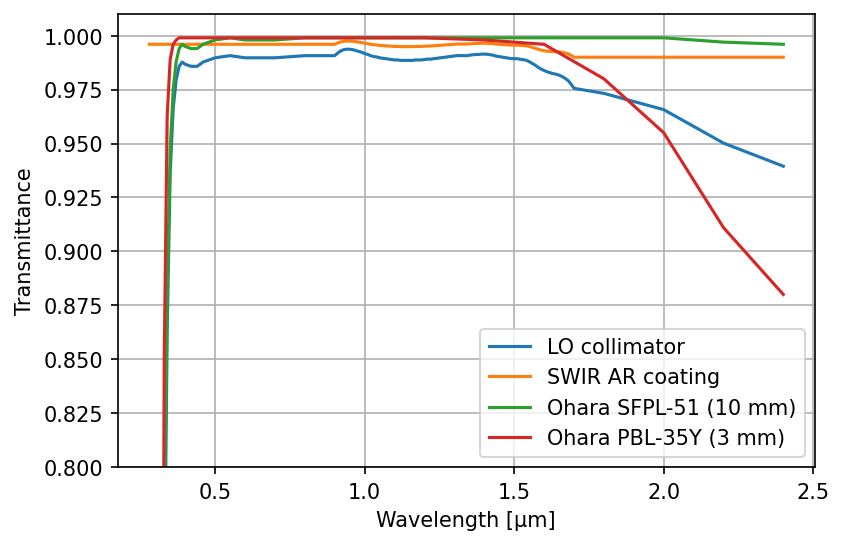

In [7]:
lo_collimator = MorfeoTransmissiveElementsCatalog.lowfs_collimator_doublet_coated_001()
swir_ar_coating = CoatingsTransmissiveElementsCatalog.ar_coating_swir_001()
ohara_sfpl51_10mm = GlassesTransmissiveElementsCatalog.ohara_SFPL51_10mm_internal_001()
ohara_pbl35y_3mm = GlassesTransmissiveElementsCatalog.ohara_PBL35Y_10mm_internal_001()
wv = lo_collimator.waveset

plt.plot(wv.to(u.um), lo_collimator.transmittance(wv), label='LO collimator')
plt.plot(wv.to(u.um), swir_ar_coating.transmittance(wv), label='SWIR AR coating')
plt.plot(wv.to(u.um), ohara_sfpl51_10mm.transmittance(wv), label='Ohara SFPL-51 (10 mm)')
plt.plot(wv.to(u.um), ohara_pbl35y_3mm.transmittance(wv), label='Ohara PBL-35Y (3 mm)')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.legend()
plt.grid()
plt.ylim(0.8, 1.01)

wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.where(np.isclose(np.array(wv), wv_H_min.to(u.Angstrom).value, atol=10))[0][0]
id_H_max = np.where(np.isclose(np.array(wv), wv_H_max.to(u.Angstrom).value, atol=10))[0][0]
print('H band average transmission of LO channel: %s' %np.mean(lo_collimator.transmittance(wv)[id_H_min:id_H_max+1]))
print(wv[id_H_min:id_H_max+1])

### LO ADC

H band average transmission of LO channel: 0.9005755283593405
[15000. 15100. 15200. 15300. 15400. 15500. 15600. 15700. 15800. 15900.
 16000. 16100. 16200. 16300. 16400. 16500. 16600. 16700. 16800. 16900.
 17000.] Angstrom


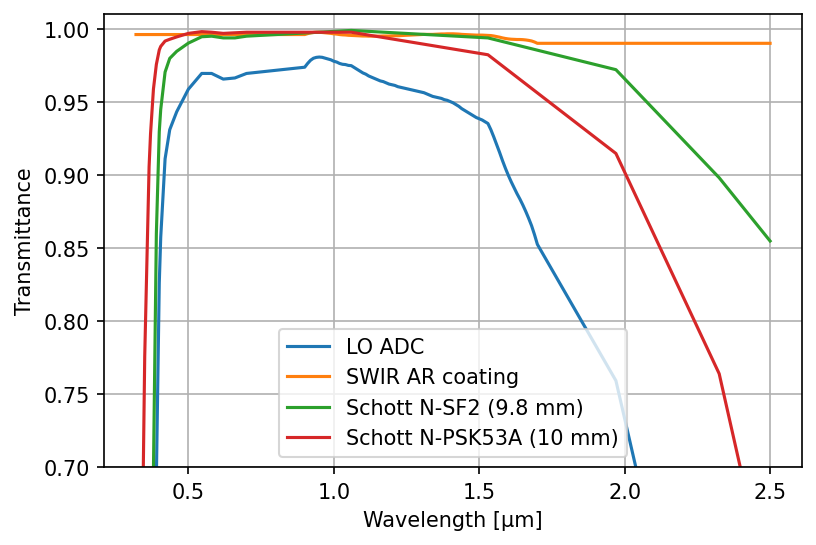

In [8]:
lo_adc = MorfeoTransmissiveElementsCatalog.lowfs_adc_002()
schott_nsf2 = GlassesTransmissiveElementsCatalog.schott_NSF2_9dot8_mm_internal_001()
schott_npsk35a = GlassesTransmissiveElementsCatalog.schott_NPSK53A_10_mm_internal_001()
wv = lo_adc.waveset

plt.plot(wv.to(u.um), lo_adc.transmittance(wv), label='LO ADC')
plt.plot(wv.to(u.um), swir_ar_coating.transmittance(wv), label='SWIR AR coating')
plt.plot(wv.to(u.um), schott_nsf2.transmittance(wv), label='Schott N-SF2 (9.8 mm)')
plt.plot(wv.to(u.um), schott_npsk35a.transmittance(wv), label='Schott N-PSK53A (10 mm)')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.legend()
plt.grid()
plt.ylim(0.7, 1.01)


wv_H_min = 1.5 * u.um
wv_H_max = 1.97 * u.um
id_H_min = np.where(np.isclose(np.array(wv), wv_H_min.to(u.Angstrom).value, atol=10))[0][0]
id_H_max = np.where(np.isclose(np.array(wv), wv_H_max.to(u.Angstrom).value, atol=10))[0][0]
print('H band average transmission of LO channel: %s' %np.mean(lo_adc.transmittance(wv)[id_H_min:id_H_max]))
print(wv[id_H_min:id_H_max])

### LO lenslet array

H band average transmission of LO channel: 0.9412982132090616
[15000. 15000. 15100. 15200. 15300. 15400. 15400. 15500. 15500. 15600.
 15600. 15700. 15700. 15800. 15800. 15900. 15900. 16000. 16000. 16100.
 16100. 16200. 16200. 16300. 16400. 16500. 16600. 16700. 16800. 16900.
 17000. 17100. 17200. 17300. 17400. 17500. 17600. 17700. 17800. 17900.
 18000.] Angstrom


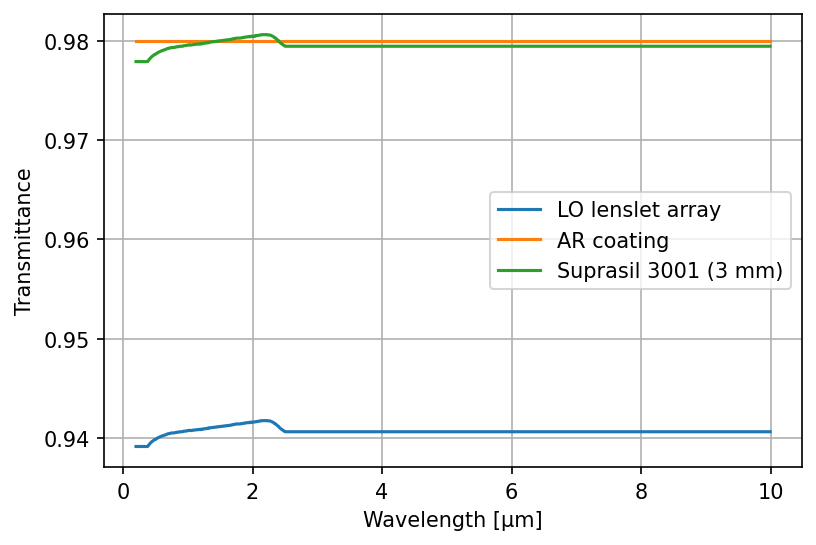

In [9]:
lo_la = MorfeoTransmissiveElementsCatalog.lowfs_lenslet_001()
ar_coat_amus = CoatingsTransmissiveElementsCatalog.ar_coating_amus_001()
supra3001_3mm = GlassesTransmissiveElementsCatalog.suprasil3001_3mm_internal_001()
wv = lo_la.waveset

plt.plot(wv.to(u.um), lo_la.transmittance(wv), label='LO lenslet array')
plt.plot(wv.to(u.um), ar_coat_amus.transmittance(wv), label='AR coating')
plt.plot(wv.to(u.um), supra3001_3mm.transmittance(wv), label='Suprasil 3001 (3 mm)')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.grid()
plt.legend()


wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.where(np.isclose(np.array(wv), wv_H_min.to(u.Angstrom).value, atol=10))[0][0]
id_H_max = np.where(np.isclose(np.array(wv), wv_H_max.to(u.Angstrom).value, atol=10))[0][0]
print('H band average transmission of LO channel: %s' %np.mean(lo_la.transmittance(wv)[id_H_min:id_H_max+1]))
print(wv[id_H_min:id_H_max+1])

### C-RED1

H band average transmission of LO channel: 0.7424097567322581
[15000. 15100. 15200. 15300. 15400. 15500. 15600. 15700. 15800. 15900.
 16000. 16100. 16200. 16300. 16400. 16500. 16600. 16700. 16800. 16900.
 17000. 17100. 17200. 17300. 17400. 17500. 17600. 17700. 17800. 17900.
 18000.] Angstrom
[8.51385857e-01 8.50853020e-01 8.50324030e-01 8.49798834e-01
 8.49277381e-01 8.48759620e-01 8.48245501e-01 8.47734976e-01
 8.47227997e-01 8.46724516e-01 8.46224489e-01 8.45727870e-01
 8.45234614e-01 8.44744679e-01 8.44258022e-01 8.43774601e-01
 8.43294375e-01 8.42817305e-01 8.42343350e-01 8.41872472e-01
 8.41404633e-01 8.40939796e-01 8.40477924e-01 7.53922852e-01
 7.53513545e-01 7.53106803e-01 7.52702596e-01 4.55095603e-01
 8.35446300e-02 9.27783800e-03 9.27297000e-05]


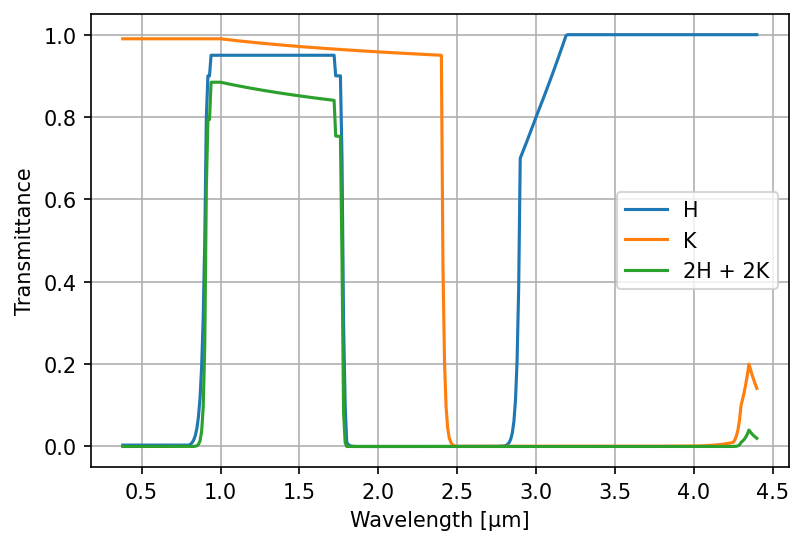

In [11]:
cold_filters = DetectorsTransmissiveElementsCatalog.c_red_one_filters_001()
h_cold_filter = DetectorsTransmissiveElementsCatalog.c_red_one_H_filter_001()
k_cold_filter = DetectorsTransmissiveElementsCatalog.c_red_one_K_filter_001()
wv = cold_filters.waveset

plt.plot(wv.to(u.um), h_cold_filter.transmittance(wv), label='H')
plt.plot(wv.to(u.um), k_cold_filter.transmittance(wv), label='K')
plt.plot(wv.to(u.um), cold_filters.transmittance(wv), label='2H + 2K')
plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmittance')
plt.legend()
plt.grid()

wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.argwhere(wv==wv_H_min.to(u.Angstrom))[0][0]
id_H_max = np.argwhere(wv==wv_H_max.to(u.Angstrom))[0][0]
print('H band average transmission of LO channel: %s' %np.mean(cold_filters.transmittance(wv)[id_H_min:id_H_max+1]))
print(wv[id_H_min:id_H_max+1])
print(cold_filters.transmittance(wv)[id_H_min:id_H_max+1])


[15000. 15100. 15200. 15300. 15400. 15500. 15600. 15700. 15800. 15900.
 16000. 16100. 16200. 16300. 16400. 16500. 16600. 16700. 16800. 16900.
 17000. 17100. 17200. 17300. 17400. 17500. 17600. 17700. 17800. 17900.
 18000.] Angstrom
H band average transmission of LO channel: 0.6824593548387098


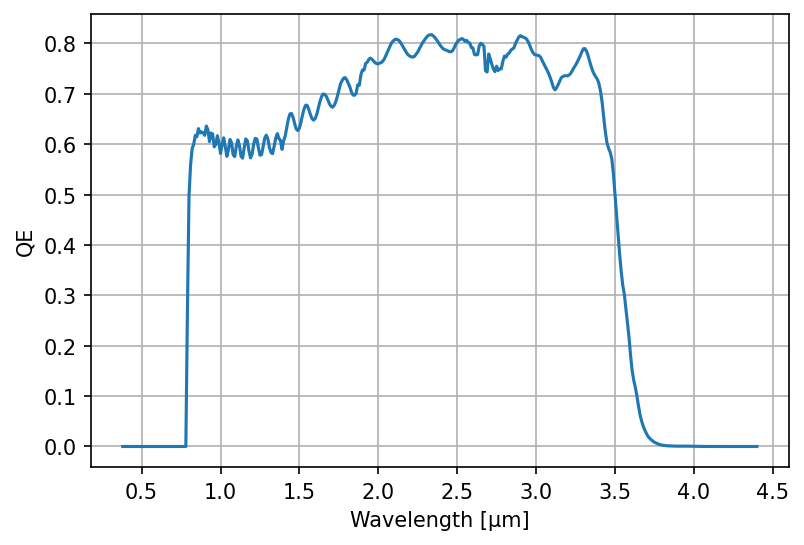

In [22]:
c_red1_qe = DetectorsTransmissiveElementsCatalog.c_red_one_qe_001()

c_red1_qe.plot(reflectance=None, absorptance=None, wv_unit=u.um)
plt.xlabel('Wavelength [μm]')
plt.ylabel('QE')
plt.legend('', frameon=False)

wv = c_red1_qe.waveset
wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um
id_H_min = np.argwhere(wv==wv_H_min.to(u.Angstrom))[0][0]
id_H_max = np.argwhere(wv==wv_H_max.to(u.Angstrom))[0][0]
print(wv[id_H_min:id_H_max+1])
print('H band average transmission of LO channel: %s' %np.mean(c_red1_qe.transmittance(wv)[id_H_min:id_H_max+1]))

(3800.0, 43400.0)

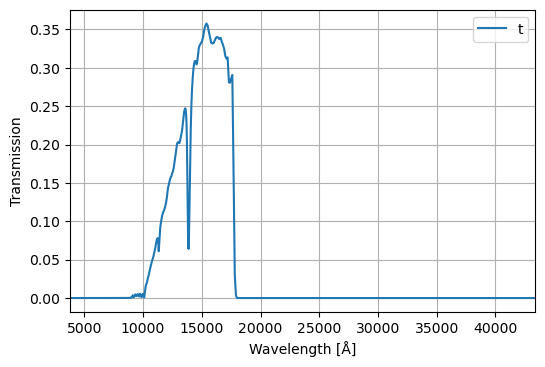

In [23]:
lo_ch = MorfeoLowOrderChannelTransmissiveSystem_002()

mpl.rcParams['figure.dpi'] = 100
lo_ch.plot(absorptance=False)
plt.xlabel('Wavelength [Å]')
plt.ylabel('Transmission')
plt.xlim(3800,43400)

In [24]:
wv_lo = lo_ch.as_transmissive_element().waveset
lo_transm = lo_ch.as_transmissive_element().transmittance(wv_lo)
wv_H_min = 1.5 * u.um
wv_H_max = 1.8 * u.um

id_H_min = np.argwhere(wv_lo==wv_H_min.to(u.Angstrom))[0][0]
id_H_max = np.argwhere(wv_lo==wv_H_max.to(u.Angstrom))[0][0]
transm_H = lo_transm[id_H_min:id_H_max]
print('H band average transmission: %s' %np.mean(transm_H))
print(wv_lo[id_H_min:id_H_max])

H band average transmission: 0.30585755694161293
[15000. 15000. 15010. 15010. 15020. 15030. 15030. 15040. 15050. 15050.
 15060. 15070. 15070. 15080. 15090. 15090. 15100. 15110. 15110. 15120.
 15130. 15130. 15140. 15150. 15150. 15160. 15170. 15170. 15180. 15190.
 15190. 15200. 15210. 15210. 15220. 15230. 15230. 15240. 15250. 15250.
 15260. 15270. 15270. 15280. 15290. 15290. 15300. 15310. 15310. 15320.
 15330. 15330. 15340. 15350. 15350. 15360. 15360. 15370. 15380. 15380.
 15390. 15400. 15400. 15400. 15410. 15420. 15420. 15430. 15440. 15440.
 15450. 15460. 15460. 15470. 15480. 15480. 15490. 15500. 15500. 15500.
 15510. 15520. 15520. 15530. 15540. 15540. 15550. 15560. 15560. 15570.
 15580. 15580. 15590. 15600. 15600. 15600. 15610. 15620. 15620. 15630.
 15640. 15640. 15650. 15660. 15660. 15670. 15680. 15680. 15690. 15700.
 15700. 15700. 15710. 15720. 15720. 15730. 15740. 15740. 15750. 15760.
 15760. 15770. 15780. 15780. 15790. 15800. 15800. 15800. 15810. 15820.
 15820. 15830. 15840. 15840.

In [25]:
wv_J_min = 1. * u.um
wv_J_max = 1.4 * u.um

id_J_min = np.argwhere(wv_lo==wv_J_min.to(u.Angstrom))[0][0]
id_J_max = np.argwhere(wv_lo==wv_J_max.to(u.Angstrom))[0][0]
print(wv_lo[id_J_min])
print(wv_lo[id_J_max])

transm_J = lo_transm[id_J_min:id_J_max]
print('J band average transmission: %s' %np.mean(transm_J))

9999.999999999998 Angstrom
13999.999999999996 Angstrom
J band average transmission: 0.11882728672832478


In [26]:
wv_HJ_min = 1. * u.um
wv_HJ_max = 1.8 * u.um

id_HJ_min = np.argwhere(wv_lo==wv_HJ_min.to(u.Angstrom))[0][0]
id_HJ_max = np.argwhere(wv_lo==wv_HJ_max.to(u.Angstrom))[0][0]
print(wv_lo[id_HJ_min])
print(wv_lo[id_HJ_max])

transm_HJ = lo_transm[id_HJ_min:id_HJ_max]
print('H+J band average transmission: %s' %np.mean(transm_HJ))

9999.999999999998 Angstrom
17999.999999999996 Angstrom
H+J band average transmission: 0.21979613559743533


# Transmission at Reference channel

In [27]:
from arte.photometry.morfeo_transmissive_systems import MorfeoReferenceChannelTransmissiveSystem_001

(0.0, 15000.0)

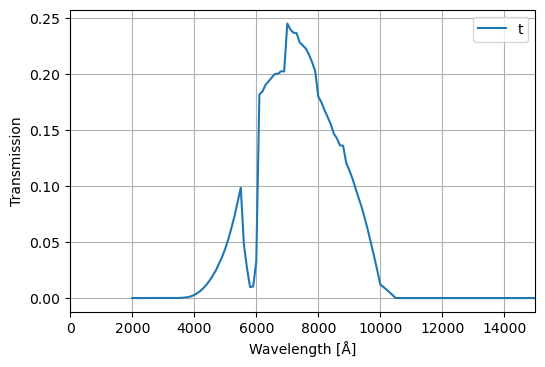

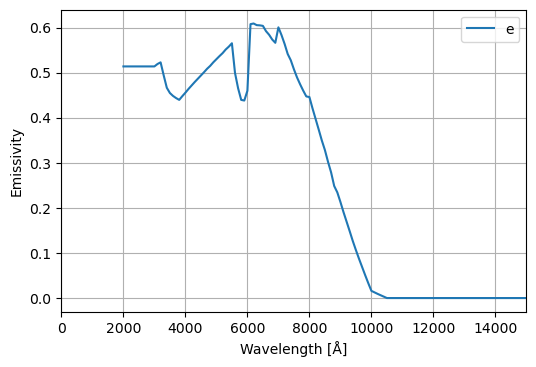

In [28]:
r_ch = MorfeoReferenceChannelTransmissiveSystem_001()

mpl.rcParams['figure.dpi'] = 100
r_ch.plot(absorptance=False)
plt.xlabel('Wavelength [Å]')
plt.ylabel('Transmission')
plt.xlim(0,15000)

plt.figure()
r_ch.plot(transmittance=False)
plt.xlabel('Wavelength [Å]')
plt.ylabel('Emissivity')
plt.legend('e')
plt.xlim(0,15000)

In [29]:
wv_r = r_ch.as_transmissive_element().waveset
r_transm = r_ch.as_transmissive_element().transmittance(wv_r)
wv_min = 0.6 * u.um
wv_max = 1. * u.um

id_min = np.argwhere(wv_r==wv_min.to(u.Angstrom))[0][0]
id_max = np.argwhere(wv_r==wv_max.to(u.Angstrom))[0][0]
transm_ref = r_transm[id_min:id_max]
print('R+I band average transmission: %s' %np.mean(transm_ref))

R+I band average transmission: 0.1435285662997691
